In [17]:
# A2

# Find best interval for every n ={12,14,16,18}
import sys
sys.path.append("/home/cheng/PycharmProjects/TSP/src/")
sys.path.append("/home/cheng/PycharmProjects/TSP/src/TravelingSalesmanProblem/")
sys.path.append("/home/cheng/PycharmProjects/TSP/")
import time
import pandas as pd

project_path = "/home/cheng/PycharmProjects/TSP/"

from TravelingSalesmanProblem.AntColonyAlgorithmForMTSP import *

for n in [14,16,18]: # n
    col = 4
    valuelst = [[] for i in range(col)]
    timelst = [[] for i in range(col)]
    interval = []
    row = 5
    k_value = [1,2,3]
    m_value = [i for i in range(1, col + 1)]
    for k in k_value: # interval
        lw = int((n-1)/2) - (k-1)
        hg = int( (n-1)/2 ) + k
        interval.extend( [(lw, hg) for i in range(row)])
        for m in m_value:  # the mth datasets of n
            print( n, k,m, lw, hg)
            lst = []
            for i in range( 10 ):
                a = time.time()
                mtsp = AntColonyAlgorithmForMTSP(iter_max= 20,alpha=1,beta=5, vol= 0.9, num= 2, 
                                    K = lw, L = hg,
                                datasets= "/home/cheng/PycharmProjects/TSP/datasets/dist%d_%d" %(n,m))
                mtsp.excution()
                b = time.time()
                # print( "time in second", b - a )
                lst.append( [ mtsp.return_best()[0], b-a])
                # mtsp.print_information()
                # mtsp.plot()
            def custom_key(x ):
                return x[0],x[1]
            lst = sorted( lst, key= custom_key )
            print( lst )
            
            valuelst[m-1].extend( [lst[i][0] for i in range( row )] )
            timelst[m-1].extend( [lst[i][1] for i in range( row )] )
            print("=== values", valuelst)
    data = []
    data.append(interval)
    data.extend(valuelst)
    data.extend(timelst)
    print( data )
    
    label =[]
    label.extend(["interval"])
    label.extend(["p%d_value"%i for i in range(1,col+1)])
    label.extend(["p%d_time"%i  for i in range(1,col+1)])
    
    path = "/home/cheng/桌面/data/A2_n%d.csv" %n
    # pd.read_csv(path)
    dataframe = pd.DataFrame()
    print( label )
    print( data )
    for i in range( len( label)):
        dataframe[ label[i] ] = data[i]
    dataframe.to_csv(path)


# mean result for every n
import pandas as pd
optional = pd.read_csv("/home/cheng/桌面/data/A1_optional.csv")
n12 = pd.read_csv("/home/cheng/桌面/data/A2_n12.csv")
n14 = pd.read_csv("/home/cheng/桌面/data/A2_n14.csv")
n16 = pd.read_csv("/home/cheng/桌面/data/A2_n16.csv")
n18 = pd.read_csv("/home/cheng/桌面/data/A2_n18.csv")

ngroup =[]
ngroup.extend([n12,n14,n16,n18])
group = [12,14,16,18]
for k in range(0,4): # group n={12,14,16,18]
    tmp = []
    for i in [0,5,10]: # interval starts at {0,5,10}
        inter = ngroup[k].iloc[i:i+5,2:6]
        tmp.append( ( optional.iloc[k,1:5] /inter).mean( axis = 0 ).values )
    tmp_ = np.array( tmp )
    tmp_ = np.around( tmp_, decimals=3)
    df = pd.DataFrame( data=tmp_, columns=["p1_value","p2_value","p3_value","p4_value"])
    df['interval']=[ngroup[k].iloc[x,1] for x in [0,5,10]]
    df.to_csv("/home/cheng/桌面/data/A2_n%d_result.csv" % group[k])
    
    
            
# solution = [0, 7, 6, 5, 11, 3, 0, 10, 4, 9, 8, 1, 2]
# mtsp = AntColonyAlgorithmForMTSP(iter_max= 20,alpha=1,beta=4, vol= 0.9, num= 2, 
#                                       K = 5, L = 6,datasets= "/home/cheng/PycharmProjects/TSP/datasets/dist12_1")
# mtsp.test_eliminate_cross_in_MTSP( solution )

14 1 1 6 7


[[116.44212685767022, 1.464780569076538], [116.44212685767022, 1.4661860466003418], [116.96814710400773, 1.4648895263671875], [116.96814710400773, 1.4773507118225098], [118.13520116738196, 1.4631361961364746], [119.31427507395236, 1.4689130783081055], [119.31427507395236, 1.470099925994873], [119.31427507395236, 1.4743683338165283], [119.31427507395236, 1.478365182876587], [119.31427507395236, 1.6044533252716064]]
=== values [[116.44212685767022, 116.44212685767022, 116.96814710400773, 116.96814710400773, 118.13520116738196], [], [], []]
14 1 2 6 7


[[150.53843858459086, 1.4613943099975586], [150.53843858459086, 1.4626953601837158], [150.53843858459086, 1.463655948638916], [150.53843858459086, 1.4644792079925537], [150.53843858459086, 1.4667222499847412], [150.53843858459086, 1.4668822288513184], [150.53843858459086, 1.4677631855010986], [150.53843858459086, 1.4679057598114014], [150.53843858459086, 1.4772284030914307], [150.53843858459086, 1.4810760021209717]]
=== values [[116.44212685767022, 116.44212685767022, 116.96814710400773, 116.96814710400773, 118.13520116738196], [150.53843858459086, 150.53843858459086, 150.53843858459086, 150.53843858459086, 150.53843858459086], [], []]
14 1 3 6 7


[[146.1077780056427, 1.4485530853271484], [146.1077780056427, 1.451124906539917], [146.1077780056427, 1.4521965980529785], [146.1077780056427, 1.452732801437378], [146.1077780056427, 1.4532017707824707], [146.1077780056427, 1.4564650058746338], [146.1077780056427, 1.4594697952270508], [146.1077780056427, 1.461594581604004], [146.1077780056427, 1.4714813232421875], [146.1077780056427, 1.487041711807251]]
=== values [[116.44212685767022, 116.44212685767022, 116.96814710400773, 116.96814710400773, 118.13520116738196], [150.53843858459086, 150.53843858459086, 150.53843858459086, 150.53843858459086, 150.53843858459086], [146.1077780056427, 146.1077780056427, 146.1077780056427, 146.1077780056427, 146.1077780056427], []]
14 1 4 6 7


[[133.78475366622672, 1.455535650253296], [133.78475366622672, 1.8436427116394043], [133.78475366622672, 2.4989054203033447], [133.78475366622672, 2.503511428833008], [133.78475366622672, 2.5068531036376953], [133.78475366622672, 2.511404514312744], [134.64182448800986, 1.4533915519714355], [134.64182448800986, 1.4704031944274902], [134.64182448800986, 1.99070405960083], [140.44342068850557, 2.5093460083007812]]
=== values [[116.44212685767022, 116.44212685767022, 116.96814710400773, 116.96814710400773, 118.13520116738196], [150.53843858459086, 150.53843858459086, 150.53843858459086, 150.53843858459086, 150.53843858459086], [146.1077780056427, 146.1077780056427, 146.1077780056427, 146.1077780056427, 146.1077780056427], [133.78475366622672, 133.78475366622672, 133.78475366622672, 133.78475366622672, 133.78475366622672]]
14 2 1 5 8


[[116.96814710400773, 1.4708611965179443], [116.96814710400773, 1.480090856552124], [119.31427507395236, 1.468829870223999], [119.31427507395236, 1.4721813201904297], [119.31427507395236, 1.4730148315429688], [119.31427507395236, 1.4786741733551025], [119.31427507395236, 1.4812817573547363], [120.43590123441487, 1.4685940742492676], [125.36467278456576, 1.4710898399353027], [129.79520718352856, 1.4648902416229248]]
=== values [[116.44212685767022, 116.44212685767022, 116.96814710400773, 116.96814710400773, 118.13520116738196, 116.96814710400773, 116.96814710400773, 119.31427507395236, 119.31427507395236, 119.31427507395236], [150.53843858459086, 150.53843858459086, 150.53843858459086, 150.53843858459086, 150.53843858459086], [146.1077780056427, 146.1077780056427, 146.1077780056427, 146.1077780056427, 146.1077780056427], [133.78475366622672, 133.78475366622672, 133.78475366622672, 133.78475366622672, 133.78475366622672]]
14 2 2 5 8


[[149.33551697016213, 2.769177198410034], [150.54321298607854, 1.9672069549560547], [150.54321298607854, 2.654040575027466], [151.57438704068994, 1.7750155925750732], [152.72619479072364, 1.465226411819458], [152.72619479072364, 1.478435754776001], [152.72619479072364, 1.622102975845337], [152.72619479072364, 2.5423004627227783], [152.72619479072364, 2.5510175228118896], [152.72619479072364, 2.6274960041046143]]
=== values [[116.44212685767022, 116.44212685767022, 116.96814710400773, 116.96814710400773, 118.13520116738196, 116.96814710400773, 116.96814710400773, 119.31427507395236, 119.31427507395236, 119.31427507395236], [150.53843858459086, 150.53843858459086, 150.53843858459086, 150.53843858459086, 150.53843858459086, 149.33551697016213, 150.54321298607854, 150.54321298607854, 151.57438704068994, 152.72619479072364], [146.1077780056427, 146.1077780056427, 146.1077780056427, 146.1077780056427, 146.1077780056427], [133.78475366622672, 133.78475366622672, 133.78475366622672, 133.784753

[[146.1077780056427, 1.694859266281128], [146.1077780056427, 1.722050428390503], [146.1077780056427, 1.7387876510620117], [146.1077780056427, 1.7728724479675293], [146.1077780056427, 1.815659999847412], [146.1077780056427, 1.8172523975372314], [146.1077780056427, 1.8246614933013916], [146.1077780056427, 1.8431010246276855], [146.1077780056427, 1.9017009735107422], [146.1077780056427, 1.9600982666015625]]
=== values [[116.44212685767022, 116.44212685767022, 116.96814710400773, 116.96814710400773, 118.13520116738196, 116.96814710400773, 116.96814710400773, 119.31427507395236, 119.31427507395236, 119.31427507395236], [150.53843858459086, 150.53843858459086, 150.53843858459086, 150.53843858459086, 150.53843858459086, 149.33551697016213, 150.54321298607854, 150.54321298607854, 151.57438704068994, 152.72619479072364], [146.1077780056427, 146.1077780056427, 146.1077780056427, 146.1077780056427, 146.1077780056427, 146.1077780056427, 146.1077780056427, 146.1077780056427, 146.1077780056427, 146.

[[133.78475366622672, 1.714738130569458], [133.78475366622672, 1.768204927444458], [133.78475366622672, 1.7983198165893555], [134.64182448800986, 1.6743676662445068], [135.63231996934803, 1.6576244831085205], [135.86436820967097, 1.6927547454833984], [135.86436820967097, 1.7732164859771729], [135.86436820967097, 1.787308692932129], [135.86436820967097, 1.8237197399139404], [135.86436820967097, 1.8242416381835938]]
=== values [[116.44212685767022, 116.44212685767022, 116.96814710400773, 116.96814710400773, 118.13520116738196, 116.96814710400773, 116.96814710400773, 119.31427507395236, 119.31427507395236, 119.31427507395236], [150.53843858459086, 150.53843858459086, 150.53843858459086, 150.53843858459086, 150.53843858459086, 149.33551697016213, 150.54321298607854, 150.54321298607854, 151.57438704068994, 152.72619479072364], [146.1077780056427, 146.1077780056427, 146.1077780056427, 146.1077780056427, 146.1077780056427, 146.1077780056427, 146.1077780056427, 146.1077780056427, 146.107778005

[[118.13520116738196, 1.838186264038086], [119.31427507395236, 1.7213706970214844], [119.31427507395236, 1.7331557273864746], [119.31427507395236, 1.7344536781311035], [119.31427507395236, 1.7669847011566162], [119.31427507395236, 1.8645985126495361], [119.31427507395236, 1.8681604862213135], [119.31427507395236, 1.8721001148223877], [119.31427507395236, 1.8851428031921387], [119.31427507395236, 1.8981366157531738]]
=== values [[116.44212685767022, 116.44212685767022, 116.96814710400773, 116.96814710400773, 118.13520116738196, 116.96814710400773, 116.96814710400773, 119.31427507395236, 119.31427507395236, 119.31427507395236, 118.13520116738196, 119.31427507395236, 119.31427507395236, 119.31427507395236, 119.31427507395236], [150.53843858459086, 150.53843858459086, 150.53843858459086, 150.53843858459086, 150.53843858459086, 149.33551697016213, 150.54321298607854, 150.54321298607854, 151.57438704068994, 152.72619479072364], [146.1077780056427, 146.1077780056427, 146.1077780056427, 146.10

[[150.54321298607854, 1.714599609375], [154.87820204029569, 1.810326337814331], [157.90398045751354, 1.7849655151367188], [157.9314592793468, 1.8780207633972168], [158.39720690363123, 1.7307636737823486], [158.39720690363123, 1.802802562713623], [159.49026601817923, 1.7284877300262451], [162.25255393327083, 1.7227842807769775], [162.25255393327083, 1.724848747253418], [162.25255393327083, 1.8081519603729248]]
=== values [[116.44212685767022, 116.44212685767022, 116.96814710400773, 116.96814710400773, 118.13520116738196, 116.96814710400773, 116.96814710400773, 119.31427507395236, 119.31427507395236, 119.31427507395236, 118.13520116738196, 119.31427507395236, 119.31427507395236, 119.31427507395236, 119.31427507395236], [150.53843858459086, 150.53843858459086, 150.53843858459086, 150.53843858459086, 150.53843858459086, 149.33551697016213, 150.54321298607854, 150.54321298607854, 151.57438704068994, 152.72619479072364, 150.54321298607854, 154.87820204029569, 157.90398045751354, 157.93145927

[[146.1077780056427, 1.7448663711547852], [146.1077780056427, 1.7471935749053955], [146.1077780056427, 1.7533793449401855], [146.1077780056427, 1.7831110954284668], [146.1077780056427, 1.817746877670288], [146.1077780056427, 1.8375296592712402], [146.1077780056427, 1.854994535446167], [146.1077780056427, 1.8830890655517578], [146.1077780056427, 2.1070876121520996], [147.56246706634357, 1.9298267364501953]]
=== values [[116.44212685767022, 116.44212685767022, 116.96814710400773, 116.96814710400773, 118.13520116738196, 116.96814710400773, 116.96814710400773, 119.31427507395236, 119.31427507395236, 119.31427507395236, 118.13520116738196, 119.31427507395236, 119.31427507395236, 119.31427507395236, 119.31427507395236], [150.53843858459086, 150.53843858459086, 150.53843858459086, 150.53843858459086, 150.53843858459086, 149.33551697016213, 150.54321298607854, 150.54321298607854, 151.57438704068994, 152.72619479072364, 150.54321298607854, 154.87820204029569, 157.90398045751354, 157.93145927934

[[133.78475366622672, 1.7656652927398682], [133.78475366622672, 1.853679895401001], [135.63231996934806, 1.7500646114349365], [139.14158523886138, 1.7537574768066406], [139.14158523886138, 1.9027373790740967], [140.68009117148318, 1.747342824935913], [140.68009117148318, 1.7988362312316895], [140.74445615240941, 1.8212897777557373], [140.88598922641276, 1.790292501449585], [140.88598922641276, 1.9230055809020996]]
=== values [[116.44212685767022, 116.44212685767022, 116.96814710400773, 116.96814710400773, 118.13520116738196, 116.96814710400773, 116.96814710400773, 119.31427507395236, 119.31427507395236, 119.31427507395236, 118.13520116738196, 119.31427507395236, 119.31427507395236, 119.31427507395236, 119.31427507395236], [150.53843858459086, 150.53843858459086, 150.53843858459086, 150.53843858459086, 150.53843858459086, 149.33551697016213, 150.54321298607854, 150.54321298607854, 151.57438704068994, 152.72619479072364, 150.54321298607854, 154.87820204029569, 157.90398045751354, 157.931


[[(6, 7), (6, 7), (6, 7), (6, 7), (6, 7), (5, 8), (5, 8), (5, 8), (5, 8), (5, 8), (4, 9), (4, 9), (4, 9), (4, 9), (4, 9)], [116.44212685767022, 116.44212685767022, 116.96814710400773, 116.96814710400773, 118.13520116738196, 116.96814710400773, 116.96814710400773, 119.31427507395236, 119.31427507395236, 119.31427507395236, 118.13520116738196, 119.31427507395236, 119.31427507395236, 119.31427507395236, 119.31427507395236], [150.53843858459086, 150.53843858459086, 150.53843858459086, 150.53843858459086, 150.53843858459086, 149.33551697016213, 150.54321298607854, 150.54321298607854, 151.57438704068994, 152.72619479072364, 150.54321298607854, 154.87820204029569, 157.90398045751354, 157.9314592793468, 158.39720690363123], [146.1077780056427, 146.1077780056427, 146.1077780056427, 146.1077780056427, 146.1077780056427, 146.1077780056427, 146.1077780056427, 146.1077780056427, 146.1077780056427, 146.1077780056427, 146.1077780056427, 146.1077780056427, 146.1077780056427, 146.1077780056427, 146.10

[[119.31427507395236, 2.786111831665039], [124.72937843327773, 2.067979574203491], [124.72937843327773, 2.1239123344421387], [124.72937843327773, 2.3142757415771484], [129.21479515488522, 2.6121506690979004], [129.85680982459866, 2.111811637878418], [129.85680982459866, 2.113551616668701], [129.85680982459866, 2.1372580528259277], [129.85680982459866, 2.148935556411743], [129.85680982459866, 2.8413851261138916]]
=== values [[119.31427507395236, 124.72937843327773, 124.72937843327773, 124.72937843327773, 129.21479515488522], [], [], []]
16 1 2 7 8


[[132.12314431344294, 2.2643299102783203], [132.12314431344294, 2.567538261413574], [132.12314431344294, 2.640735387802124], [134.50377380028019, 2.2133917808532715], [134.50377380028019, 2.3966126441955566], [134.50377380028019, 2.486715078353882], [134.50377380028019, 2.995835542678833], [137.17602747618329, 2.9993019104003906], [138.76445279548099, 2.4904627799987793], [140.39222316422337, 2.2268359661102295]]
=== values [[119.31427507395236, 124.72937843327773, 124.72937843327773, 124.72937843327773, 129.21479515488522], [132.12314431344294, 132.12314431344294, 132.12314431344294, 134.50377380028019, 134.50377380028019], [], []]
16 1 3 7 8


[[147.25668267189519, 2.1823301315307617], [147.25668267189519, 2.220275402069092], [147.25668267189519, 2.2520058155059814], [149.07826441678168, 2.1882593631744385], [149.07826441678168, 2.250728130340576], [150.71383363004119, 2.2035982608795166], [151.63230397575609, 2.1756815910339355], [151.63230397575609, 2.277885913848877], [152.8669070922565, 2.281672477722168], [152.8669070922565, 2.3027758598327637]]
=== values [[119.31427507395236, 124.72937843327773, 124.72937843327773, 124.72937843327773, 129.21479515488522], [132.12314431344294, 132.12314431344294, 132.12314431344294, 134.50377380028019, 134.50377380028019], [147.25668267189519, 147.25668267189519, 147.25668267189519, 149.07826441678168, 149.07826441678168], []]
16 1 4 7 8


[[182.32673361940624, 2.1598265171051025], [182.32673361940627, 2.094991683959961], [182.32673361940627, 2.120201826095581], [184.7505589899076, 2.095726728439331], [184.7505589899076, 2.115868091583252], [184.7505589899076, 2.1954941749572754], [188.20474665119872, 2.108424186706543], [188.72713788465234, 2.0763838291168213], [188.72713788465234, 2.0953879356384277], [188.72713788465234, 2.1131370067596436]]
=== values [[119.31427507395236, 124.72937843327773, 124.72937843327773, 124.72937843327773, 129.21479515488522], [132.12314431344294, 132.12314431344294, 132.12314431344294, 134.50377380028019, 134.50377380028019], [147.25668267189519, 147.25668267189519, 147.25668267189519, 149.07826441678168, 149.07826441678168], [182.32673361940624, 182.32673361940627, 182.32673361940627, 184.7505589899076, 184.7505589899076]]
16 2 1 6 9


[[119.31427507395236, 2.154963493347168], [119.31427507395236, 2.159153938293457], [119.31427507395236, 2.2336230278015137], [119.31427507395236, 2.2670021057128906], [119.31427507395236, 2.3137052059173584], [124.72937843327773, 2.1201534271240234], [124.72937843327773, 2.2052431106567383], [128.14940281065523, 2.263319492340088], [129.85680982459866, 2.28208589553833], [130.91659237451765, 2.3390214443206787]]
=== values [[119.31427507395236, 124.72937843327773, 124.72937843327773, 124.72937843327773, 129.21479515488522, 119.31427507395236, 119.31427507395236, 119.31427507395236, 119.31427507395236, 119.31427507395236], [132.12314431344294, 132.12314431344294, 132.12314431344294, 134.50377380028019, 134.50377380028019], [147.25668267189519, 147.25668267189519, 147.25668267189519, 149.07826441678168, 149.07826441678168], [182.32673361940624, 182.32673361940627, 182.32673361940627, 184.7505589899076, 184.7505589899076]]
16 2 2 6 9


[[133.73083946308481, 2.093507766723633], [133.73083946308481, 2.139039993286133], [133.73083946308481, 2.146784543991089], [133.73083946308481, 2.147627115249634], [133.73083946308481, 2.1823177337646484], [133.73083946308481, 2.2605838775634766], [133.73083946308481, 2.325033664703369], [138.76445279548099, 2.060593366622925], [138.76445279548099, 2.2994349002838135], [142.61301309830694, 2.1986472606658936]]
=== values [[119.31427507395236, 124.72937843327773, 124.72937843327773, 124.72937843327773, 129.21479515488522, 119.31427507395236, 119.31427507395236, 119.31427507395236, 119.31427507395236, 119.31427507395236], [132.12314431344294, 132.12314431344294, 132.12314431344294, 134.50377380028019, 134.50377380028019, 133.73083946308481, 133.73083946308481, 133.73083946308481, 133.73083946308481, 133.73083946308481], [147.25668267189519, 147.25668267189519, 147.25668267189519, 149.07826441678168, 149.07826441678168], [182.32673361940624, 182.32673361940627, 182.32673361940627, 184.75

[[147.25668267189519, 2.216480255126953], [147.25668267189519, 2.232567548751831], [147.30761803851578, 2.147393226623535], [147.30761803851578, 2.1527395248413086], [147.30761803851578, 2.1732699871063232], [147.30761803851578, 2.2051944732666016], [149.07826441678168, 2.205704689025879], [149.07826441678168, 2.346137285232544], [153.15968756808735, 2.155608654022217], [153.15968756808735, 2.178474187850952]]
=== values [[119.31427507395236, 124.72937843327773, 124.72937843327773, 124.72937843327773, 129.21479515488522, 119.31427507395236, 119.31427507395236, 119.31427507395236, 119.31427507395236, 119.31427507395236], [132.12314431344294, 132.12314431344294, 132.12314431344294, 134.50377380028019, 134.50377380028019, 133.73083946308481, 133.73083946308481, 133.73083946308481, 133.73083946308481, 133.73083946308481], [147.25668267189519, 147.25668267189519, 147.25668267189519, 149.07826441678168, 149.07826441678168, 147.25668267189519, 147.25668267189519, 147.30761803851578, 147.30761

[[177.77636883702567, 2.101818561553955], [177.77636883702567, 2.104335308074951], [178.76711842768037, 2.145655632019043], [178.76711842768037, 2.1802656650543213], [178.94452772902929, 2.170856475830078], [178.94452772902929, 2.17364501953125], [178.94452772902932, 2.0859620571136475], [178.94452772902932, 2.23348331451416], [184.84406451132608, 2.1164793968200684], [184.84406451132608, 2.1751885414123535]]
=== values [[119.31427507395236, 124.72937843327773, 124.72937843327773, 124.72937843327773, 129.21479515488522, 119.31427507395236, 119.31427507395236, 119.31427507395236, 119.31427507395236, 119.31427507395236], [132.12314431344294, 132.12314431344294, 132.12314431344294, 134.50377380028019, 134.50377380028019, 133.73083946308481, 133.73083946308481, 133.73083946308481, 133.73083946308481, 133.73083946308481], [147.25668267189519, 147.25668267189519, 147.25668267189519, 149.07826441678168, 149.07826441678168, 147.25668267189519, 147.25668267189519, 147.30761803851578, 147.307618

[[119.31427507395236, 2.0377821922302246], [119.31427507395236, 2.130722999572754], [119.31427507395236, 2.1950974464416504], [124.34296393692009, 2.039307117462158], [124.72937843327773, 2.0423789024353027], [128.14940281065523, 2.1119158267974854], [128.14940281065523, 2.1925408840179443], [130.91659237451765, 2.101775646209717], [130.91659237451765, 2.133138418197632], [130.91659237451768, 2.113887310028076]]
=== values [[119.31427507395236, 124.72937843327773, 124.72937843327773, 124.72937843327773, 129.21479515488522, 119.31427507395236, 119.31427507395236, 119.31427507395236, 119.31427507395236, 119.31427507395236, 119.31427507395236, 119.31427507395236, 119.31427507395236, 124.34296393692009, 124.72937843327773], [132.12314431344294, 132.12314431344294, 132.12314431344294, 134.50377380028019, 134.50377380028019, 133.73083946308481, 133.73083946308481, 133.73083946308481, 133.73083946308481, 133.73083946308481], [147.25668267189519, 147.25668267189519, 147.25668267189519, 149.078

[[133.73083946308481, 2.167515754699707], [133.73083946308481, 2.2650930881500244], [136.90746350171486, 2.241231918334961], [138.76445279548099, 2.1401164531707764], [138.76445279548099, 2.1449806690216064], [138.76445279548099, 2.187633991241455], [138.76445279548099, 2.193589687347412], [138.76445279548099, 2.314725875854492], [143.38658009009885, 2.1459856033325195], [143.38658009009885, 2.1593945026397705]]
=== values [[119.31427507395236, 124.72937843327773, 124.72937843327773, 124.72937843327773, 129.21479515488522, 119.31427507395236, 119.31427507395236, 119.31427507395236, 119.31427507395236, 119.31427507395236, 119.31427507395236, 119.31427507395236, 119.31427507395236, 124.34296393692009, 124.72937843327773], [132.12314431344294, 132.12314431344294, 132.12314431344294, 134.50377380028019, 134.50377380028019, 133.73083946308481, 133.73083946308481, 133.73083946308481, 133.73083946308481, 133.73083946308481, 133.73083946308481, 133.73083946308481, 136.90746350171486, 138.76445

[[147.25668267189519, 2.102865219116211], [147.25668267189519, 2.148627996444702], [147.25668267189519, 2.158210277557373], [147.66138509471025, 2.1596107482910156], [148.1795103183448, 2.1859161853790283], [148.54222115501616, 2.1507651805877686], [148.54222115501616, 2.2006938457489014], [150.10723903275641, 2.1591031551361084], [150.41645688833077, 2.072798490524292], [151.63230397575609, 2.1482744216918945]]
=== values [[119.31427507395236, 124.72937843327773, 124.72937843327773, 124.72937843327773, 129.21479515488522, 119.31427507395236, 119.31427507395236, 119.31427507395236, 119.31427507395236, 119.31427507395236, 119.31427507395236, 119.31427507395236, 119.31427507395236, 124.34296393692009, 124.72937843327773], [132.12314431344294, 132.12314431344294, 132.12314431344294, 134.50377380028019, 134.50377380028019, 133.73083946308481, 133.73083946308481, 133.73083946308481, 133.73083946308481, 133.73083946308481, 133.73083946308481, 133.73083946308481, 136.90746350171486, 138.76445

[[173.06989637250783, 2.1111199855804443], [173.06989637250783, 2.1756248474121094], [177.81289244532729, 2.1442439556121826], [178.9080041207277, 2.1178691387176514], [179.2585472561355, 2.11289644241333], [184.99266797043128, 2.080836534500122], [185.09366556087602, 2.1270158290863037], [185.26903628631612, 2.141834259033203], [185.33921793908883, 2.1028854846954346], [195.86788166826369, 2.1096959114074707]]
=== values [[119.31427507395236, 124.72937843327773, 124.72937843327773, 124.72937843327773, 129.21479515488522, 119.31427507395236, 119.31427507395236, 119.31427507395236, 119.31427507395236, 119.31427507395236, 119.31427507395236, 119.31427507395236, 119.31427507395236, 124.34296393692009, 124.72937843327773], [132.12314431344294, 132.12314431344294, 132.12314431344294, 134.50377380028019, 134.50377380028019, 133.73083946308481, 133.73083946308481, 133.73083946308481, 133.73083946308481, 133.73083946308481, 133.73083946308481, 133.73083946308481, 136.90746350171486, 138.764452

18 1 1 8 9


[[138.3636070632989, 2.412046432495117], [138.39107751920164, 2.396052837371826], [138.39107751920164, 2.463808298110962], [138.39107751920164, 2.5411791801452637], [139.69065189729648, 2.387237787246704], [139.69065189729648, 2.4169819355010986], [139.69065189729648, 2.4198415279388428], [139.69065189729648, 2.4200212955474854], [139.69065189729648, 2.477649688720703], [140.86037724872054, 2.4132766723632812]]
=== values [[138.3636070632989, 138.39107751920164, 138.39107751920164, 138.39107751920164, 139.69065189729648], [], [], []]
18 1 2 8 9


[[139.49708171169257, 2.403623104095459], [139.49708171169257, 2.416139602661133], [139.49708171169257, 2.4257798194885254], [139.49708171169257, 2.431765079498291], [139.49708171169257, 2.4345335960388184], [139.49708171169257, 2.4371140003204346], [139.49708171169257, 2.442888021469116], [139.49708171169257, 2.4773030281066895], [139.49708171169257, 2.4855904579162598], [139.49708171169257, 2.48822283744812]]
=== values [[138.3636070632989, 138.39107751920164, 138.39107751920164, 138.39107751920164, 139.69065189729648], [139.49708171169257, 139.49708171169257, 139.49708171169257, 139.49708171169257, 139.49708171169257], [], []]
18 1 3 8 9


[[145.56467400549107, 2.4328582286834717], [145.56467400549107, 2.4560587406158447], [145.56467400549107, 2.5851542949676514], [151.00029822607033, 2.462820291519165], [151.26362929607865, 2.464935064315796], [151.39318255643681, 2.425746202468872], [151.39318255643681, 2.5147509574890137], [151.39318255643681, 2.544605016708374], [151.39318255643681, 2.5704309940338135], [151.39318255643681, 2.6686973571777344]]
=== values [[138.3636070632989, 138.39107751920164, 138.39107751920164, 138.39107751920164, 139.69065189729648], [139.49708171169257, 139.49708171169257, 139.49708171169257, 139.49708171169257, 139.49708171169257], [145.56467400549107, 145.56467400549107, 145.56467400549107, 151.00029822607033, 151.26362929607865], []]
18 1 4 8 9


[[173.95567378984452, 2.3153111934661865], [173.95567378984452, 2.49245023727417], [176.02459872376019, 2.6091833114624023], [178.7881774485225, 2.5348029136657715], [178.90943642876331, 2.698720693588257], [180.54147020838548, 2.7083725929260254], [186.92885691927404, 2.889361619949341], [188.54174050271371, 2.610020637512207], [188.54174050271371, 2.619511842727661], [190.21751878177992, 2.620041608810425]]
=== values [[138.3636070632989, 138.39107751920164, 138.39107751920164, 138.39107751920164, 139.69065189729648], [139.49708171169257, 139.49708171169257, 139.49708171169257, 139.49708171169257, 139.49708171169257], [145.56467400549107, 145.56467400549107, 145.56467400549107, 151.00029822607033, 151.26362929607865], [173.95567378984452, 173.95567378984452, 176.02459872376019, 178.7881774485225, 178.90943642876331]]
18 2 1 7 10


[[132.6369602492025, 2.1518876552581787], [132.6369602492025, 2.1730306148529053], [139.69065189729648, 2.1167750358581543], [139.69065189729648, 2.1317191123962402], [140.03807024185809, 2.117292642593384], [140.94339261271409, 2.244136095046997], [141.12453557810971, 2.0850284099578857], [141.50605373443091, 2.1092090606689453], [141.50605373443091, 2.210711717605591], [141.79615847546395, 2.1844356060028076]]
=== values [[138.3636070632989, 138.39107751920164, 138.39107751920164, 138.39107751920164, 139.69065189729648, 132.6369602492025, 132.6369602492025, 139.69065189729648, 139.69065189729648, 140.03807024185809], [139.49708171169257, 139.49708171169257, 139.49708171169257, 139.49708171169257, 139.49708171169257], [145.56467400549107, 145.56467400549107, 145.56467400549107, 151.00029822607033, 151.26362929607865], [173.95567378984452, 173.95567378984452, 176.02459872376019, 178.7881774485225, 178.90943642876331]]
18 2 2 7 10


[[141.03286751975025, 2.5540480613708496], [143.28563638413098, 2.241607427597046], [143.28563638413098, 2.4425108432769775], [143.28563638413098, 2.5820720195770264], [143.28563638413098, 2.582982063293457], [143.28563638413098, 2.5992486476898193], [143.28563638413098, 2.656778335571289], [143.28563638413098, 2.667572498321533], [143.28563638413098, 2.7266972064971924], [143.28563638413098, 2.7781264781951904]]
=== values [[138.3636070632989, 138.39107751920164, 138.39107751920164, 138.39107751920164, 139.69065189729648, 132.6369602492025, 132.6369602492025, 139.69065189729648, 139.69065189729648, 140.03807024185809], [139.49708171169257, 139.49708171169257, 139.49708171169257, 139.49708171169257, 139.49708171169257, 141.03286751975025, 143.28563638413098, 143.28563638413098, 143.28563638413098, 143.28563638413098], [145.56467400549107, 145.56467400549107, 145.56467400549107, 151.00029822607033, 151.26362929607865], [173.95567378984452, 173.95567378984452, 176.02459872376019, 178.788

[[150.27167516148194, 2.0568506717681885], [150.27167516148194, 2.107402801513672], [150.27167516148194, 2.239684581756592], [150.27167516148194, 2.347020387649536], [150.27167516148194, 2.3774142265319824], [150.27167516148194, 2.416147470474243], [150.27167516148194, 2.422375440597534], [150.27167516148194, 2.452047824859619], [150.27167516148194, 2.5970494747161865], [150.27167516148194, 2.601693868637085]]
=== values [[138.3636070632989, 138.39107751920164, 138.39107751920164, 138.39107751920164, 139.69065189729648, 132.6369602492025, 132.6369602492025, 139.69065189729648, 139.69065189729648, 140.03807024185809], [139.49708171169257, 139.49708171169257, 139.49708171169257, 139.49708171169257, 139.49708171169257, 141.03286751975025, 143.28563638413098, 143.28563638413098, 143.28563638413098, 143.28563638413098], [145.56467400549107, 145.56467400549107, 145.56467400549107, 151.00029822607033, 151.26362929607865, 150.27167516148194, 150.27167516148194, 150.27167516148194, 150.27167516

[[176.86728071865991, 2.330672025680542], [177.54820965970447, 2.3610620498657227], [177.54820965970447, 2.380765199661255], [178.7881774485225, 2.0746121406555176], [178.7881774485225, 2.094980478286743], [180.53048998015643, 2.0841710567474365], [180.53048998015643, 2.1766889095306396], [181.33294625917657, 2.084451675415039], [181.33294625917657, 2.264650821685791], [181.39443959754593, 2.1216094493865967]]
=== values [[138.3636070632989, 138.39107751920164, 138.39107751920164, 138.39107751920164, 139.69065189729648, 132.6369602492025, 132.6369602492025, 139.69065189729648, 139.69065189729648, 140.03807024185809], [139.49708171169257, 139.49708171169257, 139.49708171169257, 139.49708171169257, 139.49708171169257, 141.03286751975025, 143.28563638413098, 143.28563638413098, 143.28563638413098, 143.28563638413098], [145.56467400549107, 145.56467400549107, 145.56467400549107, 151.00029822607033, 151.26362929607865, 150.27167516148194, 150.27167516148194, 150.27167516148194, 150.27167516

[[132.6369602492025, 2.48527455329895], [132.6369602492025, 2.6720223426818848], [132.6369602492025, 2.8887062072753906], [137.24965130651037, 2.244844675064087], [141.50605373443091, 2.3585455417633057], [141.50605373443091, 2.421199321746826], [141.50605373443091, 2.4417343139648438], [141.50605373443091, 2.4595391750335693], [142.89103323696202, 2.8442044258117676], [143.86861400184512, 2.5553157329559326]]
=== values [[138.3636070632989, 138.39107751920164, 138.39107751920164, 138.39107751920164, 139.69065189729648, 132.6369602492025, 132.6369602492025, 139.69065189729648, 139.69065189729648, 140.03807024185809, 132.6369602492025, 132.6369602492025, 132.6369602492025, 137.24965130651037, 141.50605373443091], [139.49708171169257, 139.49708171169257, 139.49708171169257, 139.49708171169257, 139.49708171169257, 141.03286751975025, 143.28563638413098, 143.28563638413098, 143.28563638413098, 143.28563638413098], [145.56467400549107, 145.56467400549107, 145.56467400549107, 151.00029822607

[[141.03286751975025, 2.8731296062469482], [142.34493131222283, 2.8079426288604736], [143.28563638413098, 2.5911245346069336], [143.28563638413098, 2.62807559967041], [143.28563638413098, 2.6598806381225586], [143.28563638413098, 2.6772003173828125], [143.28563638413098, 2.7541942596435547], [143.28563638413098, 2.7842369079589844], [143.28563638413098, 2.815021514892578], [143.28563638413098, 2.889383316040039]]
=== values [[138.3636070632989, 138.39107751920164, 138.39107751920164, 138.39107751920164, 139.69065189729648, 132.6369602492025, 132.6369602492025, 139.69065189729648, 139.69065189729648, 140.03807024185809, 132.6369602492025, 132.6369602492025, 132.6369602492025, 137.24965130651037, 141.50605373443091], [139.49708171169257, 139.49708171169257, 139.49708171169257, 139.49708171169257, 139.49708171169257, 141.03286751975025, 143.28563638413098, 143.28563638413098, 143.28563638413098, 143.28563638413098, 141.03286751975025, 142.34493131222283, 143.28563638413098, 143.2856363841

[[148.67840854001057, 2.3948874473571777], [148.67840854001057, 2.426085948944092], [148.67840854001057, 2.695162296295166], [150.27167516148194, 2.515061378479004], [150.27167516148194, 2.6758875846862793], [150.27167516148194, 2.682507038116455], [150.27167516148194, 2.747702121734619], [150.27167516148194, 2.750540256500244], [150.27167516148194, 2.7827835083007812], [150.27167516148194, 2.8091766834259033]]
=== values [[138.3636070632989, 138.39107751920164, 138.39107751920164, 138.39107751920164, 139.69065189729648, 132.6369602492025, 132.6369602492025, 139.69065189729648, 139.69065189729648, 140.03807024185809, 132.6369602492025, 132.6369602492025, 132.6369602492025, 137.24965130651037, 141.50605373443091], [139.49708171169257, 139.49708171169257, 139.49708171169257, 139.49708171169257, 139.49708171169257, 141.03286751975025, 143.28563638413098, 143.28563638413098, 143.28563638413098, 143.28563638413098, 141.03286751975025, 142.34493131222283, 143.28563638413098, 143.285636384130

[[173.95567378984452, 2.5459139347076416], [178.5187472795358, 2.72238826751709], [178.90943642876331, 2.71293306350708], [180.18003483847923, 2.4962334632873535], [180.20709250636989, 2.577582836151123], [180.28734304375371, 2.799532175064087], [180.53048998015643, 2.556192398071289], [181.1845384963367, 2.3953943252563477], [181.1845384963367, 2.8464701175689697], [181.33294625917657, 2.5837788581848145]]
=== values [[138.3636070632989, 138.39107751920164, 138.39107751920164, 138.39107751920164, 139.69065189729648, 132.6369602492025, 132.6369602492025, 139.69065189729648, 139.69065189729648, 140.03807024185809, 132.6369602492025, 132.6369602492025, 132.6369602492025, 137.24965130651037, 141.50605373443091], [139.49708171169257, 139.49708171169257, 139.49708171169257, 139.49708171169257, 139.49708171169257, 141.03286751975025, 143.28563638413098, 143.28563638413098, 143.28563638413098, 143.28563638413098, 141.03286751975025, 142.34493131222283, 143.28563638413098, 143.28563638413098, 

In [4]:
# A3

# Find best antnum
import sys
sys.path.append("/home/cheng/PycharmProjects/TSP/src/")
sys.path.append("/home/cheng/PycharmProjects/TSP/src/TravelingSalesmanProblem/")
sys.path.append("/home/cheng/PycharmProjects/TSP/")
import time
import pandas as pd

project_path = "/home/cheng/PycharmProjects/TSP/"

from TravelingSalesmanProblem.AntColonyAlgorithmForMTSP import *

best_interval = [(4,7),(6,7),(6,9),(8,9)]
groupnum = [12, 14,16,18]
antnum = 25
for n in range(4): # n
    col = 4
    valuelst = [[] for i in range(col)]
    timelst = [[] for i in range(col)]
    interval = [] 
    row = 5
    k_value = [i for i in range(1, antnum +1 )]
    m_value = [i for i in range(1, col + 1)]
    for k in k_value: # antnum
        lw = best_interval[n][0]
        hg = best_interval[n][1]
        interval.extend( [k for i in range(row)]) # 5 times for each problem
        for m in m_value:  # the mth datasets of n
            print( groupnum[n], k,m )
            lst = []
            for i in range( 10 ):
                a = time.time()
                mtsp = AntColonyAlgorithmForMTSP(iter_max= 20,alpha=1,beta=5, vol= 0.9, num= 2, 
                                    K = lw, L = hg, m = k,
                    datasets= "/home/cheng/PycharmProjects/TSP/datasets/dist%d_%d" 
                              %(groupnum[n],m))
                mtsp.excution()
                b = time.time()
                # print( "time in second", b - a )
                lst.append( [ mtsp.return_best()[0], b-a])
                # mtsp.print_information()
                # mtsp.plot()
            def custom_key(x ):
                return x[0],x[1]
            lst = sorted( lst, key= custom_key )
            # print( lst )
            
            valuelst[m-1].extend( [lst[i][0] for i in range( row )] )
            timelst[m-1].extend( [lst[i][1] for i in range( row )] )
            # print("=== values", valuelst)
    data = []
    data.append(interval)
    data.extend(valuelst)
    data.extend(timelst)
    # print( data )
    
    label =[]
    label.extend(["antnum"])
    label.extend(["p%d_value"%i for i in range(1,col+1)])
    label.extend(["p%d_time"%i  for i in range(1,col+1)])
    
    path = "/home/cheng/桌面/data/A3_n%d.csv" % groupnum[n]
    # pd.read_csv(path)
    dataframe = pd.DataFrame()
    # print( label )
    # print( data )
    for i in range( len( label)):
        dataframe[ label[i] ] = data[i]
    dataframe.to_csv(path)


# mean result for every n
import pandas as pd
optional = pd.read_csv("/home/cheng/桌面/data/A1_optional.csv")
n12 = pd.read_csv("/home/cheng/桌面/data/A3_n12.csv")
n14 = pd.read_csv("/home/cheng/桌面/data/A3_n14.csv")
n16 = pd.read_csv("/home/cheng/桌面/data/A3_n16.csv")
n18 = pd.read_csv("/home/cheng/桌面/data/A3_n18.csv")

ngroup =[]
ngroup.extend([n12,n14,n16,n18])
group = [12,14,16,18]
for k in range(0,4): # group n={12,14,16,18]
    tmp = []
    for i in [start*5 for start in range( antnum )]: # interval starts at {0,5,10}
        inter = ngroup[k].iloc[i:i+5,2:6]
        proportion = ( optional.iloc[k,1:5] /inter).mean( axis = 0 ).values
        timevalue = (ngroup[k].iloc[i:i+5, 6:10]).mean(axis= 0).values
        tmp_lst = proportion.tolist()
        tmp_lst.extend( timevalue.tolist() )
        tmp.append(tmp_lst)
    tmp_ = np.array( tmp )
    tmp_ = np.around( tmp_, decimals=3)
    df = pd.DataFrame( data=tmp_, columns=["p1_value","p2_value","p3_value","p4_value",
                                           "p1_time","p2_tim","p3_time","p4_time"])
    df['antnum']=[ngroup[k].iloc[x,1] for x in [start*5 for start in range(antnum)] ]
    df.to_csv("/home/cheng/桌面/data/A3_n%d_result.csv" % group[k])
print("done")

12 1 1


12 1 2


12 1 3


12 1 4


12 2 1


12 2 2


12 2 3


12 2 4


12 3 1


12 3 2


12 3 3


12 3 4


12 4 1


12 4 2


12 4 3


12 4 4


12 5 1


12 5 2


12 5 3


12 5 4


12 6 1


12 6 2


12 6 3


12 6 4


12 7 1


12 7 2


12 7 3


12 7 4


12 8 1


12 8 2


12 8 3


12 8 4


12 9 1


12 9 2


12 9 3


12 9 4


12 10 1


12 10 2


12 10 3


12 10 4


12 11 1


12 11 2


12 11 3


12 11 4


12 12 1


12 12 2


12 12 3


12 12 4


12 13 1


12 13 2


12 13 3


12 13 4


12 14 1


12 14 2


12 14 3


12 14 4


12 15 1


12 15 2


12 15 3


12 15 4


12 16 1


12 16 2


12 16 3


12 16 4


12 17 1


12 17 2


12 17 3


12 17 4


12 18 1


12 18 2


12 18 3


12 18 4


12 19 1


12 19 2


12 19 3


12 19 4


12 20 1


12 20 2


12 20 3


12 20 4


12 21 1


12 21 2


12 21 3


12 21 4


12 22 1


12 22 2


12 22 3


12 22 4


12 23 1


12 23 2


12 23 3


12 23 4


12 24 1


12 24 2


12 24 3


12 24 4


12 25 1


12 25 2


12 25 3


12 25 4


14 1 1


14 1 2


14 1 3


14 1 4


14 2 1


14 2 2


14 2 3


14 2 4


14 3 1


14 3 2


14 3 3


14 3 4


14 4 1


14 4 2


14 4 3


14 4 4


14 5 1


14 5 2


14 5 3


14 5 4


14 6 1


14 6 2


14 6 3


14 6 4


14 7 1


14 7 2


14 7 3


14 7 4


14 8 1


14 8 2


14 8 3


14 8 4


14 9 1


14 9 2


14 9 3


14 9 4


14 10 1


14 10 2


14 10 3


14 10 4


14 11 1


14 11 2


14 11 3


14 11 4


14 12 1


14 12 2


14 12 3


14 12 4


14 13 1


14 13 2


14 13 3


14 13 4


14 14 1


14 14 2


14 14 3


14 14 4


14 15 1


14 15 2


14 15 3


14 15 4


14 16 1


14 16 2


14 16 3


14 16 4


14 17 1


14 17 2


14 17 3


14 17 4


14 18 1


14 18 2


14 18 3


14 18 4


14 19 1


14 19 2


14 19 3


14 19 4


14 20 1


14 20 2


14 20 3


14 20 4


14 21 1


14 21 2


14 21 3


14 21 4


14 22 1


14 22 2


14 22 3


14 22 4


14 23 1


14 23 2


14 23 3


14 23 4


14 24 1


14 24 2


14 24 3


14 24 4


14 25 1


14 25 2


14 25 3


14 25 4


16 1 1


16 1 2


16 1 3


16 1 4


16 2 1


16 2 2


16 2 3


16 2 4


16 3 1


16 3 2


16 3 3


16 3 4


16 4 1


16 4 2


16 4 3


16 4 4


16 5 1


16 5 2


16 5 3


16 5 4


16 6 1


16 6 2


16 6 3


16 6 4


16 7 1


16 7 2


16 7 3


16 7 4


16 8 1


16 8 2


16 8 3


16 8 4


16 9 1


16 9 2


16 9 3


16 9 4


16 10 1


16 10 2


16 10 3


16 10 4


16 11 1


16 11 2


16 11 3


16 11 4


16 12 1


16 12 2


16 12 3


16 12 4


16 13 1


16 13 2


16 13 3


16 13 4


16 14 1


16 14 2


16 14 3


16 14 4


16 15 1


16 15 2


16 15 3


16 15 4


16 16 1


16 16 2


16 16 3


16 16 4


16 17 1


16 17 2


16 17 3


16 17 4


16 18 1


16 18 2


16 18 3


16 18 4


16 19 1


16 19 2


16 19 3


16 19 4


16 20 1


16 20 2


16 20 3


16 20 4


16 21 1


16 21 2


16 21 3


16 21 4


16 22 1


16 22 2


16 22 3


16 22 4


16 23 1


16 23 2


16 23 3


16 23 4


16 24 1


16 24 2


16 24 3


16 24 4


16 25 1


16 25 2


16 25 3


16 25 4


18 1 1


18 1 2


18 1 3


18 1 4


18 2 1


18 2 2


18 2 3


18 2 4


18 3 1


18 3 2


18 3 3


18 3 4


18 4 1


18 4 2


18 4 3


18 4 4


18 5 1


18 5 2


18 5 3


18 5 4


18 6 1


18 6 2


18 6 3


18 6 4


18 7 1


18 7 2


18 7 3


18 7 4


18 8 1


18 8 2


18 8 3


18 8 4


18 9 1


18 9 2


18 9 3


18 9 4


18 10 1


18 10 2


18 10 3


18 10 4


18 11 1


18 11 2


18 11 3


18 11 4


18 12 1


18 12 2


18 12 3


18 12 4


18 13 1


18 13 2


18 13 3


18 13 4


18 14 1


18 14 2


18 14 3


18 14 4


18 15 1


18 15 2


18 15 3


18 15 4


18 16 1


18 16 2


18 16 3


18 16 4


18 17 1


18 17 2


18 17 3


18 17 4


18 18 1


18 18 2


18 18 3


18 18 4


18 19 1


18 19 2


18 19 3


18 19 4


18 20 1


18 20 2


18 20 3


18 20 4


18 21 1


18 21 2


18 21 3


18 21 4


18 22 1


18 22 2


18 22 3


18 22 4


18 23 1


18 23 2


18 23 3


18 23 4


18 24 1


18 24 2


18 24 3


18 24 4


18 25 1


18 25 2


18 25 3


18 25 4


done


In [6]:
# A3
import pandas as pd
proportion = pd.read_excel("/home/cheng/桌面/data/A3_result.xlsx","Sheet1")
timelst = pd.read_excel("/home/cheng/桌面/data/A3_result.xlsx","Sheet2")

import matplotlib.pyplot as plt
pro = proportion['average'].values.tolist()
tim = timelst['average'].values.tolist()
print( pro)
print( tim)

index = [i for i in range( 1, len(pro) +1 )]
# plt.figure( figsize=(10,10))
plt.plot(index, pro, 'o-', label="Propotion",  linewidth = 1)
plt.plot(index, tim, "*-", label="Time", linewidth=1)
plt.legend(loc="lower right")
plt.savefig("/home/cheng/桌面/data/A3_result.jpg")
plt.show()

In [1]:
# A4 

# 1, ensure initial amount of trial
import sys
sys.path.append("/home/cheng/PycharmProjects/TSP/src/")
sys.path.append("/home/cheng/PycharmProjects/TSP/src/TravelingSalesmanProblem/")
sys.path.append("/home/cheng/PycharmProjects/TSP/")
import time
import pandas as pd

project_path = "/home/cheng/PycharmProjects/TSP/"

from TravelingSalesmanProblem.AntColonyAlgorithmForMTSP import *

best_interval = [(4,7),(6,7),(6,9),(8,9)]
groupnum = [12, 14,16,18]
antnum = 7
for n in range(4): # n
    col = 4
    valuelst = [[] for i in range(col)]
    timelst = [[] for i in range(col)]
    interval = [] 
    row = 5
    k_value = [1,10,100,1000]
    m_value = [i for i in range(1, col + 1)]
    for k in k_value: # antnum
        lw = best_interval[n][0]
        hg = best_interval[n][1]
        interval.extend( [k for i in range(row)]) # 5 times for each problem
        for m in m_value:  # the mth datasets of n
            print( groupnum[n], k,m )
            lst = []
            for i in range( 10 ):
                a = time.time()
                mtsp = AntColonyAlgorithmForMTSP(iter_max= 20,alpha=1,beta=5, vol= 0.9, num= 2, 
                                    K = lw, L = hg, m = antnum, inittrail=k,
                    datasets= "/home/cheng/PycharmProjects/TSP/datasets/dist%d_%d" 
                              %(groupnum[n],m))
                mtsp.excution()
                b = time.time()
                # print( "time in second", b - a )
                lst.append( [ mtsp.return_best()[0], b-a])
                # mtsp.print_information()
                # mtsp.plot()
            def custom_key(x ):
                return x[0],x[1]
            lst = sorted( lst, key= custom_key )
            # print( lst )
            
            valuelst[m-1].extend( [lst[i][0] for i in range( row )] )
            timelst[m-1].extend( [lst[i][1] for i in range( row )] )
            # print("=== values", valuelst)
    data = []
    data.append(interval)
    data.extend(valuelst)
    data.extend(timelst)
    # print( data )
    
    label =[]
    label.extend(["inittrail"])
    label.extend(["p%d_value"%i for i in range(1,col+1)])
    label.extend(["p%d_time"%i  for i in range(1,col+1)])
    
    path = "/home/cheng/桌面/data/A4_n%d.csv" % groupnum[n]
    # pd.read_csv(path)
    dataframe = pd.DataFrame()
    # print( label )
    # print( data )
    for i in range( len( label)):
        dataframe[ label[i] ] = data[i]
    dataframe.to_csv(path)


# 2, mean result for every n
import pandas as pd
optional = pd.read_csv("/home/cheng/桌面/data/A1_optional.csv")
n12 = pd.read_csv("/home/cheng/桌面/data/A4_n12.csv")
n14 = pd.read_csv("/home/cheng/桌面/data/A4_n14.csv")
n16 = pd.read_csv("/home/cheng/桌面/data/A4_n16.csv")
n18 = pd.read_csv("/home/cheng/桌面/data/A4_n18.csv")

ngroup =[]
ngroup.extend([n12,n14,n16,n18])
group = [12,14,16,18]
inittrailnum = 4
for k in range(0,4): # group n={12,14,16,18]
    tmp = []
    for i in [start*5 for start in range( inittrailnum )]: # interval starts at {0,5,10}
        inter = ngroup[k].iloc[i:i+5,2:6]
        proportion = ( optional.iloc[k,1:5] /inter).mean( axis = 0 ).values
        timevalue = (ngroup[k].iloc[i:i+5, 6:10]).mean(axis= 0).values
        tmp_lst = proportion.tolist()
        tmp_lst.extend( timevalue.tolist() )
        tmp.append(tmp_lst)
    tmp_ = np.array( tmp )
    tmp_ = np.around( tmp_, decimals=3)
    df = pd.DataFrame( data=tmp_, columns=["p1_value","p2_value","p3_value","p4_value",
                                           "p1_time","p2_tim","p3_time","p4_time"])
    df['inittrail']=[ngroup[k].iloc[x,1] for x in [start*5 for start in range(inittrailnum)] ]
    df.to_csv("/home/cheng/桌面/data/A4_n%d_result.csv" % group[k])
print("done")

# 3, average proportion and time
bottom = np.zeros((1,inittrailnum))
df = pd.DataFrame()
groupn = [12,14,16,18]
inittrail = [1, 10,100,1000]
for i in range(inittrailnum):
    df['n%d'% groupn[i] ] = mp[i].iloc[:,1:5].mean( axis= 1).values
    bottom = bottom + mp[i].iloc[:,1:5].mean( axis= 1).values
    print( bottom)
print( df )
df['average'] = df.mean(axis = 1).values
print(df['average'])
df['inittrail']= inittrail
df.to_csv("/home/cheng/桌面/data/A4_propotion_result.csv")
proportionA4 = bottom/inittrailnum

bottom = np.zeros((1,inittrailnum))
df = pd.DataFrame()
for i in range(inittrailnum):
    df['n%d'% groupn[i] ] = mp[i].iloc[:,5:9].mean( axis= 1).values
    bottom = bottom + mp[i].iloc[:,5:9].mean( axis= 1).values
df['average'] = df.mean(axis = 1).values
df['inittrail']= inittrail
df.to_csv("/home/cheng/桌面/data/A4_time_result.csv")
timeA4 = bottom /inittrailnum

import matplotlib.pyplot as plt
pro = proportionA4[0].tolist()
tim = timeA4[0].tolist()
print( pro)
print( tim)

index = [i for i in range( 1, len(pro) +1 )]
# plt.figure( figsize=(10,10))
plt.plot(index, pro, 'o-', label="Propotion",  linewidth = 1)
plt.plot(index, tim, "*-", label="Time", linewidth=1)
plt.legend(loc="center right")
plt.savefig("/home/cheng/桌面/data/A4_result.jpg")
plt.show()


12 1 1


12 1 2


12 1 3


12 1 4


12 10 1


12 10 2


12 10 3


12 10 4


12 100 1


12 100 2


12 100 3


12 100 4


12 1000 1


12 1000 2


12 1000 3


12 1000 4


14 1 1


14 1 2


14 1 3


14 1 4


14 10 1


14 10 2


14 10 3


14 10 4


14 100 1


14 100 2


14 100 3


14 100 4


14 1000 1


14 1000 2


14 1000 3


14 1000 4


16 1 1


16 1 2


16 1 3


16 1 4


16 10 1


16 10 2


16 10 3


16 10 4


16 100 1


16 100 2


16 100 3


16 100 4


16 1000 1


16 1000 2


16 1000 3


16 1000 4


18 1 1


18 1 2


18 1 3


18 1 4


18 10 1


18 10 2


18 10 3


18 10 4


18 100 1


18 100 2


18 100 3


18 100 4


18 1000 1


18 1000 2


18 1000 3


18 1000 4


done


In [31]:
# A5

# 1, find best p
import sys
sys.path.append("/home/cheng/PycharmProjects/TSP/src/")
sys.path.append("/home/cheng/PycharmProjects/TSP/src/TravelingSalesmanProblem/")
sys.path.append("/home/cheng/PycharmProjects/TSP/")
import time
import pandas as pd

project_path = "/home/cheng/PycharmProjects/TSP/"

from TravelingSalesmanProblem.AntColonyAlgorithmForMTSP import *

best_interval = [(4,7),(6,7),(6,9),(8,9)]
groupnum = [12, 14,16,18]
antnum = 7
for n in range(4): # n
    col = 4
    valuelst = [[] for i in range(col)]
    timelst = [[] for i in range(col)]
    interval = [] 
    row = 5
    k_value = [ 0.1*i for i in range(1,10)]
    m_value = [i for i in range(1, col + 1)]
    for k in k_value: # antnum
        lw = best_interval[n][0]
        hg = best_interval[n][1]
        interval.extend( [k for i in range(row)]) # 5 times for each problem
        for m in m_value:  # the mth datasets of n
            print( groupnum[n], k,m )
            lst = []
            for i in range( 10 ):
                a = time.time()
                mtsp = AntColonyAlgorithmForMTSP(iter_max= 20,alpha=1,beta=5, vol= k, num= 2, 
                                    K = lw, L = hg, m = antnum, inittrail=1,
                    datasets= "/home/cheng/PycharmProjects/TSP/datasets/dist%d_%d" 
                              %(groupnum[n],m))
                mtsp.excution()
                b = time.time()
                # print( "time in second", b - a )
                lst.append( [ mtsp.return_best()[0], b-a])
                # mtsp.print_information()
                # mtsp.plot()
            def custom_key(x ):
                return x[0],x[1]
            lst = sorted( lst, key= custom_key )
            # print( lst )
            
            valuelst[m-1].extend( [lst[i][0] for i in range( row )] )
            timelst[m-1].extend( [lst[i][1] for i in range( row )] )
            # print("=== values", valuelst)
    data = []
    data.append(interval)
    data.extend(valuelst)
    data.extend(timelst)
    # print( data )
    
    label =[]
    label.extend(["pho"])
    label.extend(["p%d_value"%i for i in range(1,col+1)])
    label.extend(["p%d_time"%i  for i in range(1,col+1)])
    
    path = "/home/cheng/桌面/data/A5_n%d.csv" % groupnum[n]
    # pd.read_csv(path)
    dataframe = pd.DataFrame()
    # print( label )
    # print( data )
    for i in range( len( label)):
        dataframe[ label[i] ] = data[i]
    dataframe.to_csv(path)


# 2, mean result for every n
import pandas as pd
optional = pd.read_csv("/home/cheng/桌面/data/A1_optional.csv")
n12 = pd.read_csv("/home/cheng/桌面/data/A5_n12.csv")
n14 = pd.read_csv("/home/cheng/桌面/data/A5_n14.csv")
n16 = pd.read_csv("/home/cheng/桌面/data/A5_n16.csv")
n18 = pd.read_csv("/home/cheng/桌面/data/A5_n18.csv")

ngroup =[]
ngroup.extend([n12,n14,n16,n18])
group = [12,14,16,18]
inittrailnum = 9
for k in range(0,4): # group n={12,14,16,18]
    tmp = []
    for i in [start*5 for start in range( inittrailnum )]: # interval starts at {0,5,10}
        inter = ngroup[k].iloc[i:i+5,2:6]
        proportion = ( optional.iloc[k,1:5] /inter).mean( axis = 0 ).values
        timevalue = (ngroup[k].iloc[i:i+5, 6:10]).mean(axis= 0).values
        tmp_lst = proportion.tolist()
        tmp_lst.extend( timevalue.tolist() )
        tmp.append(tmp_lst)
    tmp_ = np.array( tmp )
    tmp_ = np.around( tmp_, decimals=3)
    df = pd.DataFrame( data=tmp_, columns=["p1_value","p2_value","p3_value","p4_value",
                                           "p1_time","p2_tim","p3_time","p4_time"])
    df['pho']=[ngroup[k].iloc[x,1] for x in [start*5 for start in range(inittrailnum)] ]
    df.to_csv("/home/cheng/桌面/data/A5_n%d_result.csv" % group[k])
print("done")

# 3, average proportion and time
groupn = [12,14,16,18]
mp = []
for i in groupn:
    tmp = pd.read_csv('/home/cheng/桌面/data/A5_n%d_result.csv' % i)
    mp.append( tmp )
    
bottom = np.zeros((1,inittrailnum))
df = pd.DataFrame()
groupn = [12,14,16,18]
inittrail = [0.1*i for i in range(inittrailnum)]
for i in range( len( groupn ) ):
    df['n%d'% groupn[i] ] = mp[i].iloc[:,1:5].mean( axis= 1).values
    bottom = bottom + mp[i].iloc[:,1:5].mean( axis= 1).values
    print( bottom)
print( df )
df['average'] = df.mean(axis = 1).values
print(df['average'])
df['pho']= inittrail
df.to_csv("/home/cheng/桌面/data/A5_propotion_result.csv")
proportionA4 = bottom/len( groupn)

bottom = np.zeros((1,inittrailnum))
df = pd.DataFrame()
for i in range(len( groupn )):
    df['n%d'% groupn[i] ] = mp[i].iloc[:,5:9].mean( axis= 1).values
    bottom = bottom + mp[i].iloc[:,5:9].mean( axis= 1).values
df['average'] = df.mean(axis = 1).values
df['pho']= inittrail
df.to_csv("/home/cheng/桌面/data/A5_time_result.csv")
timeA4 = bottom /len( groupn )

import matplotlib.pyplot as plt
pro = proportionA4[0].tolist()
tim = timeA4[0].tolist()
print( pro)
print( tim)

index = [i for i in range( 1, len(pro) +1 )]
# plt.figure( figsize=(10,10))
plt.plot(index, pro, 'o-', label="Propotion",  linewidth = 1)
plt.plot(index, tim, "*-", label="Time", linewidth=1)
plt.legend(loc="center right")
plt.savefig("/home/cheng/桌面/data/A5_result.jpg")
plt.show()



12 0.1 1


12 0.1 2


12 0.1 3


12 0.1 4


12 0.2 1


12 0.2 2


12 0.2 3


12 0.2 4


12 0.30000000000000004 1


12 0.30000000000000004 2


12 0.30000000000000004 3


12 0.30000000000000004 4


12 0.4 1


12 0.4 2


12 0.4 3


12 0.4 4


12 0.5 1


12 0.5 2


12 0.5 3


12 0.5 4


12 0.6000000000000001 1


12 0.6000000000000001 2


12 0.6000000000000001 3


12 0.6000000000000001 4


12 0.7000000000000001 1


12 0.7000000000000001 2


12 0.7000000000000001 3


12 0.7000000000000001 4


12 0.8 1


12 0.8 2


12 0.8 3


12 0.8 4


12 0.9 1


12 0.9 2


12 0.9 3


12 0.9 4


14 0.1 1


14 0.1 2


14 0.1 3


14 0.1 4


14 0.2 1


14 0.2 2


14 0.2 3


14 0.2 4


14 0.30000000000000004 1


14 0.30000000000000004 2


14 0.30000000000000004 3


14 0.30000000000000004 4


14 0.4 1


14 0.4 2


14 0.4 3


14 0.4 4


14 0.5 1


14 0.5 2


14 0.5 3


14 0.5 4


14 0.6000000000000001 1


14 0.6000000000000001 2


14 0.6000000000000001 3


14 0.6000000000000001 4


14 0.7000000000000001 1


14 0.7000000000000001 2


14 0.7000000000000001 3


14 0.7000000000000001 4


14 0.8 1


14 0.8 2


14 0.8 3


14 0.8 4


14 0.9 1


14 0.9 2


14 0.9 3


14 0.9 4


16 0.1 1


16 0.1 2


16 0.1 3


16 0.1 4


16 0.2 1


16 0.2 2


16 0.2 3


16 0.2 4


16 0.30000000000000004 1


16 0.30000000000000004 2


16 0.30000000000000004 3


16 0.30000000000000004 4


16 0.4 1


16 0.4 2


16 0.4 3


16 0.4 4


16 0.5 1


16 0.5 2


16 0.5 3


16 0.5 4


16 0.6000000000000001 1


16 0.6000000000000001 2


16 0.6000000000000001 3


16 0.6000000000000001 4


16 0.7000000000000001 1


16 0.7000000000000001 2


16 0.7000000000000001 3


16 0.7000000000000001 4


16 0.8 1


16 0.8 2


16 0.8 3


16 0.8 4


16 0.9 1


16 0.9 2


16 0.9 3


16 0.9 4


18 0.1 1


18 0.1 2


18 0.1 3


18 0.1 4


18 0.2 1


18 0.2 2


18 0.2 3


18 0.2 4


18 0.30000000000000004 1


18 0.30000000000000004 2


18 0.30000000000000004 3


18 0.30000000000000004 4


18 0.4 1


18 0.4 2


18 0.4 3


18 0.4 4


18 0.5 1


18 0.5 2


18 0.5 3


18 0.5 4


18 0.6000000000000001 1


18 0.6000000000000001 2


18 0.6000000000000001 3


18 0.6000000000000001 4


18 0.7000000000000001 1


18 0.7000000000000001 2


18 0.7000000000000001 3


18 0.7000000000000001 4


18 0.8 1


18 0.8 2


18 0.8 3


18 0.8 4


18 0.9 1


18 0.9 2


18 0.9 3


18 0.9 4


done


ValueError: operands could not be broadcast together with shapes (1,9) (4,) 

[[ 0.9755   0.97675  0.9755   0.97325  0.97625  0.97525  0.972    0.9645
   0.96525]]
[[ 1.9635   1.96275  1.9635   1.96025  1.9645   1.961    1.96075  1.95025
   1.9465 ]]
[[ 2.92875  2.93475  2.93825  2.92075  2.92525  2.93225  2.92525  2.9135
   2.9115 ]]
[[ 3.8835   3.90475  3.896    3.87575  3.88525  3.87325  3.876    3.8665
   3.8635 ]]
       n12      n14      n16      n18
0  0.97550  0.98800  0.96525  0.95475
1  0.97675  0.98600  0.97200  0.97000
2  0.97550  0.98800  0.97475  0.95775
3  0.97325  0.98700  0.96050  0.95500
4  0.97625  0.98825  0.96075  0.96000
5  0.97525  0.98575  0.97125  0.94100
6  0.97200  0.98875  0.96450  0.95075
7  0.96450  0.98575  0.96325  0.95300
8  0.96525  0.98125  0.96500  0.95200
0    0.970875
1    0.976188
2    0.974000
3    0.968938
4    0.971313
5    0.968312
6    0.969000
7    0.966625
8    0.965875
Name: average, dtype: float64
[0.9708749999999999, 0.9761875000000001, 0.974, 0.9689375, 0.9713125, 0.9683124999999999, 0.9690000000000001, 0.9666250

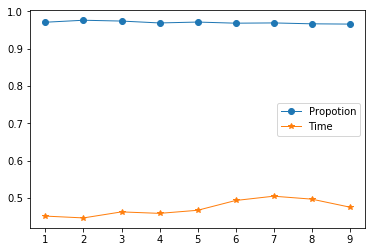

In [39]:

# 3, average proportion and time
bottom = np.zeros((1,inittrailnum))
df = pd.DataFrame()
groupn = [12,14,16,18]
inittrail = [0.1*i for i in range(inittrailnum)]
for i in range( len( groupn ) ):
    df['n%d'% groupn[i] ] = mp[i].iloc[:,1:5].mean( axis= 1).values
    bottom = bottom + mp[i].iloc[:,1:5].mean( axis= 1).values
    print( bottom)
print( df )
df['average'] = df.mean(axis = 1).values
print(df['average'])
df['pho']= inittrail
df.to_csv("/home/cheng/桌面/data/A5_propotion_result.csv")
proportionA4 = bottom/len( groupn)

bottom = np.zeros((1,inittrailnum))
df = pd.DataFrame()
for i in range(len( groupn )):
    df['n%d'% groupn[i] ] = mp[i].iloc[:,5:9].mean( axis= 1).values
    bottom = bottom + mp[i].iloc[:,5:9].mean( axis= 1).values
df['average'] = df.mean(axis = 1).values
df['pho']= inittrail
df.to_csv("/home/cheng/桌面/data/A5_time_result.csv")
timeA4 = bottom /len( groupn )

import matplotlib.pyplot as plt
pro = proportionA4[0].tolist()
tim = timeA4[0].tolist()
print( pro)
print( tim)

index = [i for i in range( 1, len(pro) +1 )]
# plt.figure( figsize=(10,10))
plt.plot(index, pro, 'o-', label="Propotion",  linewidth = 1)
plt.plot(index, tim, "*-", label="Time", linewidth=1)
plt.legend(loc="center right")
plt.savefig("/home/cheng/桌面/data/A5_result.jpg")
plt.show()

[0, 10, 6, 11, 9, 1, 0, 2, 8, 7, 5, 3, 4]
1
<class 'numpy.ndarray'>


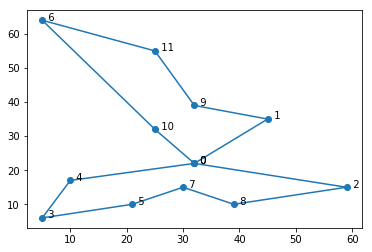

[121 120]


In [21]:
# Plot route of the optimal solution
import pandas  as pd
seq = 12
dataset = 4
length = 2
mp = []
for i in range( length ):
    tmp = pd.read_excel('/home/cheng/桌面/dist.xlsx','dist%d_%d_%d' % (seq, dataset, i+1)).values
    mp.append( tmp )

route = []
for k in range( length ):
    tmp = [0]
    i = mp[k][0].tolist().index(1) 
    while i != 0:
        tmp.append( int(i) )
        i = mp[k][i].tolist().index(1)
    route.append( tmp )

result = []
for i in route:
    result.extend( i )
print( result )

# solution = [0, 7, 6, 5, 11, 3, 0, 10, 4, 9, 8, 1, 2]
# result = [0, 7, 6, 5, 3, 11, 0, 10, 4, 9, 8, 1, 2] 

# plot result 
import sys
sys.path.append("/home/cheng/PycharmProjects/TSP/src/")
sys.path.append("/home/cheng/PycharmProjects/TSP/src/TravelingSalesmanProblem/")
sys.path.append("/home/cheng/PycharmProjects/TSP/")

project_path = "/home/cheng/PycharmProjects/TSP/"

from TravelingSalesmanProblem.AntColonyAlgorithmForMTSP import *

mtsp = AntColonyAlgorithmForMTSP(iter_max= 20, num= length, K = 3, L = 7,
                datasets= "/home/cheng/PycharmProjects/TSP/datasets/dist%d_%d" % (seq, dataset) )
import numpy as np
result = np.array( result )
mtsp.plot_route( result )
mtsp.print_length(result)